# Cardiotocograms (CTG) classification

I am currently undertaking the nanodegree in Machine Learning from Udacity and so far I am very happy with it. By the time I am starting this project I have completed the first three projects of the degree. These projects are great as they give you precise instructions on how to structure the code so that it is easily readable and understandable. However the downside is that there is a lot of babysitting. With this project I wanted to test my skills of independently formalize and solve a supervised ML classification problem. Also I wanted to have fun experimenting with all the techniques I learned so far. I found this simple database on UCI website: http://mlr.cs.umass.edu/ml/datasets/Cardiotocography. It has 2126 instances, 21 features + 2 labels and doesn't have missing values. As a plus it comes from real CTG scans (https://en.wikipedia.org/wiki/Cardiotocography) which gives me more motivation to analyze it as my goal is to work in bioengineering and I hope to come across more datasets like this in the near future :-) 

### Features

|Feature| Description|
|---|---|
|LB | Fetal Heart Rate baseline (beats per minute)|
|AC | # of accelerations per second| 
|FM | # of fetal movements per second| 
|UC | # of uterine contractions per second| 
|DL | # of light decelerations per second| 
|DS | # of severe decelerations per second| 
|DP | # of prolongued decelerations per second| 
|ASTV | percentage of time with abnormal short term variability| 
|MSTV | mean value of short term variability| 
|ALTV | percentage of time with abnormal long term variability| 
|MLTV | mean value of long term variability| 
|Width | width of FHR histogram| 
|Min | minimum of FHR histogram| 
|Max | Maximum of FHR histogram| 
|Nmax | # of histogram peaks| 
|Nzeros | # of histogram zeros| 
|Mode | histogram mode| 
|Mean | histogram mean| 
|Median | histogram median| 
|Variance | histogram variance| 
|Tendency | histogram tendency| 
|CLASS | FHR pattern class code 1 to 10 for classes A to SUSP| 
|NSP | fetal state class code (1=Normal; 2=Suspect; 3=Pathologic)|

In [41]:
import pandas as pd 
import numpy as np
%matplotlib notebook

In [2]:
CTG = pd.read_csv("CTG.csv")
fs_labels = CTG['NSP']
mp_labels = CTG['CLASS']
data = CTG.drop(['CLASS', 'NSP'], axis = 1)

In [3]:
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000


So, first thing that I notice about the data is that the range of values varies a lot among features: for example LB is in the order of 10^2 while AC is in the order of 10^-2. This characteristic may cause those classifiers that rely on the calculation of some form of distance to take decisions on how to split data to perform poorly. Let's take SVMs for example: the goal of the learning algorithm is to find the hyperplane that best separates two classes of data. If value range changes too much among features it is possible that significant variations in a feature with small range are not taken into account by the classifier because obscured by a small change in a wide range one. In this case a variation of 50% in the mean in AC ( = 0.029) will be less valuable to the classifier than a variation of 5% in LB (= 127.35). Other classifiers that have this problem are Kmeans and Neural Networks. An easy solution to this problem is to normalize all the values to the same range: by doing so the information is preserved and now is comparable for each feature.
It is definitely worth to notice that there are classifiers that do not care if the features have different ranges, an example are trees and, as a consiquence, random forests. This class of classifiers (eheh) learn the a binary tree that at each node takes into account one and only one feature (there is a lot of smart engineering in doing this, I will talk about this later) and splits the data according to some metric. Bayesian classifiers are another class that does not care about range as all they want are the prior probabilities of each feature.

Basically this whole problem can be described with this example: imagine of being asked to separate N boxes of fruits (data points) containing one orange, one strawberry and one cherry according to the fruits color from dark to light. You cannot move fruits from one box to the other, but just order the boxes according to the amount of dark or light fruits they contain. One technique to do so is to compare one type of fruit in each box first and order accordingly and then repeat for the others. This is the trees philosophy. It is clear how in this case there is no need to worry on how cherries compare to oranges because we are not actually making that comparison, what we are actually measuring is the change of color in, say, cherries first, then strawberries then oranges. The other approach is to compare the boxes as whole, the SVM's approach. In this case you will be forced to look at things from a wider perspective and most likely those fruits that have a wider range of colors like strawberries will have a greater weight in defining the position of each box than oranges that are all of a similar, well, orange. However a small change in the oranges color should be as significant as a big one in strawberries. Basically normalization ends fruit racism ;-)

In [4]:
count = np.zeros(3)

for val in fs_labels:
    
    count[val - 1] += 1
        
class_freq = count/len(fs_labels)
for idx, freq in np.ndenumerate(class_freq):
    print "The frequency of class {0} is {1:.3}".format(idx[0]+1, freq)

The frequency of class 1 is 0.778
The frequency of class 2 is 0.139
The frequency of class 3 is 0.0828


Another thing that I learned is always best practice to do is to check if classes are equally represented in the data. This is extremely important because a skewed dataset will likely teach that by often guessing the predominant class it will be correst the majority of the time. And indeed this is excactly the case of this dataset. As can be seen from the results above Normal cases represents circa the 78% of the data, Suspects ones the 14% and those that are classified as Pathologic only the 8%. This is not surprising given that these data are a sample of a real distribution of health conditions. A disease normally affects only a small part of the population while the majority are healthy.

There are some ways in which we can deal with skewed data and this nice blogpost explains very well the main actions that can be taken: http://florianhartl.com/thoughts-on-machine-learning-dealing-with-skewed-classes.html . As the author says the first thing to consider is the metric choice.

Then how you sample the data. This though can be done only if you hypothesize that data were not collected correctly and they actually come from a distribution with uniformally represented classes which is not my case. I know that it being a generic medical exam I will have a higher representation of healthy oveer pathological ones.

ensembling seems like a super duper good idea. Explain briefly and focus on it later.


## Data preparation

In [12]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, fs_labels, test_size = 0.25)

# add development set for later analysis of features

X_train_dev, X_test_dev, y_train_dev, y_test_dev = train_test_split(X_train, y_train, test_size = 0.10)


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.grid_search import RandomizedSearchCV 
from time import time

classifier = RandomForestClassifier(n_estimators = 128, n_jobs = 4)

parameters = {'max_depth': (8, 9, 10, 11), 'min_samples_split': (10, 30, 50, 70, 100)}

scoring_function = make_scorer(f1_score, greater_is_better = True, average = 'micro')

clf = RandomizedSearchCV(classifier, parameters, random_state = 42, n_jobs = 4, n_iter = 20)

t0 = time()

clf.fit(X_train_dev, y_train_dev)

t1 = time()

y_pred = clf.predict(X_test_dev)

print "F1 score for development set: {}".format(f1_score(y_test_dev, y_pred, average = 'micro'))
print "Training done in {}s".format(t1 - t0)

F1 score for development set: 0.9
Training done in 14.5569999218s


In [32]:
count_train = np.zeros(3)

for val in y_train_dev:
    count_train[val - 1] += 1
    
count_test = np.zeros(3)
for val in y_test_dev:
    count_test[val - 1] += 1
    
print count_train
print count_test

[ 1106.   192.   136.]
[ 126.   25.    9.]


In [39]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_dev, y_pred)

array([[122,   4,   0],
       [ 10,  15,   0],
       [  1,   1,   7]])

<IPython.core.display.Javascript object>


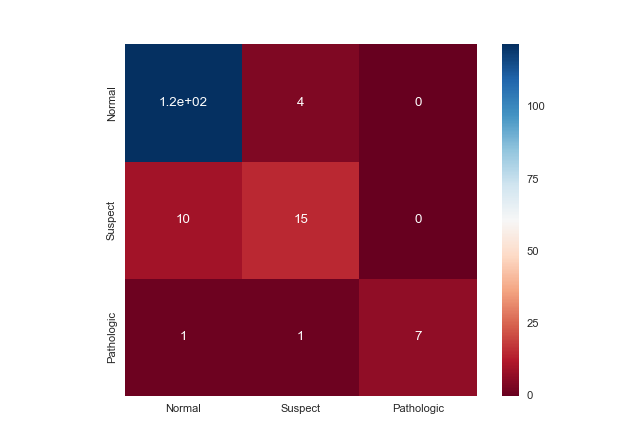

In [46]:
import seaborn as sns 
import matplotlib.pyplot as plt

labels = ['Normal', 'Suspect', 'Pathologic']

with sns.axes_style('white'):
    plt.figure()
    ax = sns.heatmap(cm, square=True, xticklabels=labels, yticklabels=labels, annot=True, cmap='RdBu')
    